In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('./student_data.csv')

In [7]:
cat_features = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 
                'schoolsup' ,'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
cont_features = ['age', 'absences']

cat_df = df[cat_features]
cont_df = df[cont_features]

# 2.1 Data Quality Report

In [25]:
# Cat. Feature Data Quality Report
# Feature feature
cat_dq_report = pd.DataFrame(cat_df.columns.values)
cat_dq_report.columns = ['Feature']
cat_dq_report = cat_dq_report.reindex(columns = cat_dq_report.columns.tolist() + 
                                      ['Count', 'Miss %', 'Card.', 'Mode', 'Mode Freq.', 'Mode %', '2nd Mode', '2nd Mode Freq.', '2nd Mode %'])

# Count feature
cat_dq_report['Count'] = cat_df.shape[0]

for i, feature in enumerate(cat_dq_report['Feature']):
    cat_dq_report.iloc[i:i+1, 2] = cat_df[feature].isna().sum() / cat_df.shape[0] # Miss %
    
    mode_info_df =  cat_df[feature].value_counts().reset_index()
    
    cat_dq_report.iloc[i:i+1, 3] = mode_info_df['index'].shape[0] # Card. feature
    cat_dq_report.iloc[i:i+1, 4] = mode_info_df.at[0, 'index'] # Mode
    cat_dq_report.iloc[i:i+1, 5] = mode_info_df.at[0, feature] # Mode Freq.
    cat_dq_report.iloc[i:i+1, 7] = mode_info_df.at[1, 'index'] # 2nd Mode
    cat_dq_report.iloc[i:i+1, 8] = mode_info_df.at[1, feature] # 2nd Mode Freq.

# Deriving mode % for first and second mode
cat_dq_report['Mode %'] = cat_dq_report['Mode Freq.'] / cat_dq_report['Count'] * 100
cat_dq_report['2nd Mode %'] = cat_dq_report['2nd Mode Freq.'] / cat_dq_report['Count'] * 100

cat_dq_report.head()

,Feature,Count,Miss %,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %
0,school,1044,0.0,2.0,GP,772.0,73.946360,MS,272.0,26.053640
1,sex,1044,0.0,2.0,F,591.0,56.609195,M,453.0,43.390805
2,address,1044,0.0,2.0,U,759.0,72.701149,R,285.0,27.298851
3,famsize,1044,0.0,2.0,GT3,738.0,70.689655,LE3,306.0,29.310345
4,Pstatus,1044,0.0,2.0,T,923.0,88.409962,A,121.0,11.590038


In [43]:
# Cont. Feature Data Quality Report
# Feature feature
cont_dq_report = pd.DataFrame(cont_df.columns.values)
cont_dq_report.columns = ['Feature']

cont_desc = cont_df[cont_dq_report['Feature']].describe()

# Turning rows of cont_desc into columns of our data quality report
for i, row in enumerate(list(cont_desc.index.values)):
    cont_dq_report[row] = cont_desc[i:i+1][:].T.values

cont_dq_report['% Miss.'] = 0
for i, feature in enumerate(cont_dq_report['Feature']):
    cont_dq_report.iloc[i:i+1, 1] = cont_df[feature].isna().sum() / cont_df.shape[0] # Miss %

# Cardinality feature
cont_dq_report['Card.'] = df[cont_dq_report['Feature']].nunique().values

cont_dq_report = cont_dq_report[['Feature', 'count', '% Miss.', 'Card.', 'min', '25%', 'mean', '50%', '75%', 'max', 'std']]
cont_dq_report.rename({'count': 'Count', 'min': 'Min.', '25%': '1st Qrt.', 'mean': 'Mean', '50%': 'Median', '75%': '3rd Qrt.', 'max': 'Max.', 'std': 'Std. Dev.'}, axis=1, inplace=True)
cont_dq_report.head()

,Feature,Count,% Miss.,Card.,Min.,1st Qrt.,Mean,Median,3rd Qrt.,Max.,Std. Dev.
0,age,0.0,0,8,15.0,16.0,16.726054,17.0,18.0,22.0,1.239975
1,absences,0.0,0,35,0.0,0.0,4.434866,2.0,6.0,75.0,6.210017


# 2.1.2 Data Visualizations 

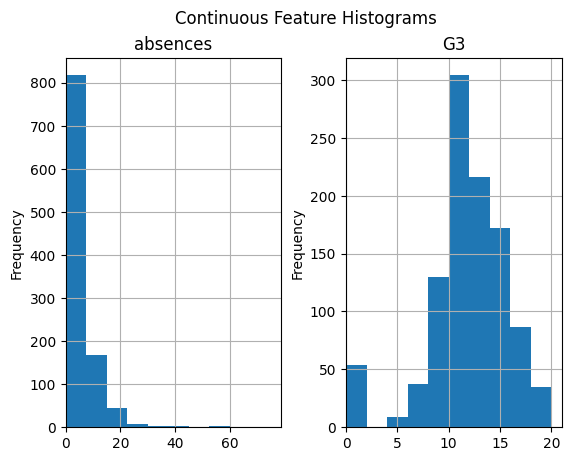

In [6]:
# Continuous Features Histograms
fig, axes = plt.subplots(1, 2)

df.hist('absences', ax=axes[0])
df.hist('G3',ax=axes[1])

fig.suptitle("Continuous Feature Histograms")
axes[0].set_ylabel('Frequency'), axes[1].set_ylabel('Frequency')
axes[0].set_xlim(xmin=0), axes[1].set_xlim(xmin=0)

plt.show()